*BART (Bidirectional Auto-Regressive Transformers) (Denoising Autoencoder based on Transformer) is a language model developed by Facebook AI that is pre-trained for natural language processing (NLP) tasks. The name "denoising autoencoder" refers to the objective used during the pretraining phase of BART.*

*BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art language representation model developed by Google. BERT's key innovation is its ability to encode a sentence in both directions (left-to-right and right-to-left) in its pre-training process, allowing it to capture the context of words in the sentence more effectively. This bidirectional approach allows BERT to outperform previous models on a wide range of tasks in natural language processing, such as sentiment analysis, question-answering, and text classification.*

*GPT (Generative Pre-trained Transformer) is a language model developed by OpenAI. It is a type of autoregressive decoder, meaning that it generates a sequence of text one token at a time, using the previously generated tokens as input to predict the next one. The GPT model is pre-trained on large amounts of text data and fine-tuned for specific NLP tasks, such as text generation, question answering, and language translation. The decoder in GPT is based on the Transformer architecture, which allows it to efficiently handle long-range dependencies and capture context from both past and future tokens. This combination of pre-training and the Transformer decoder makes GPT a powerful tool for many NLP applications.*

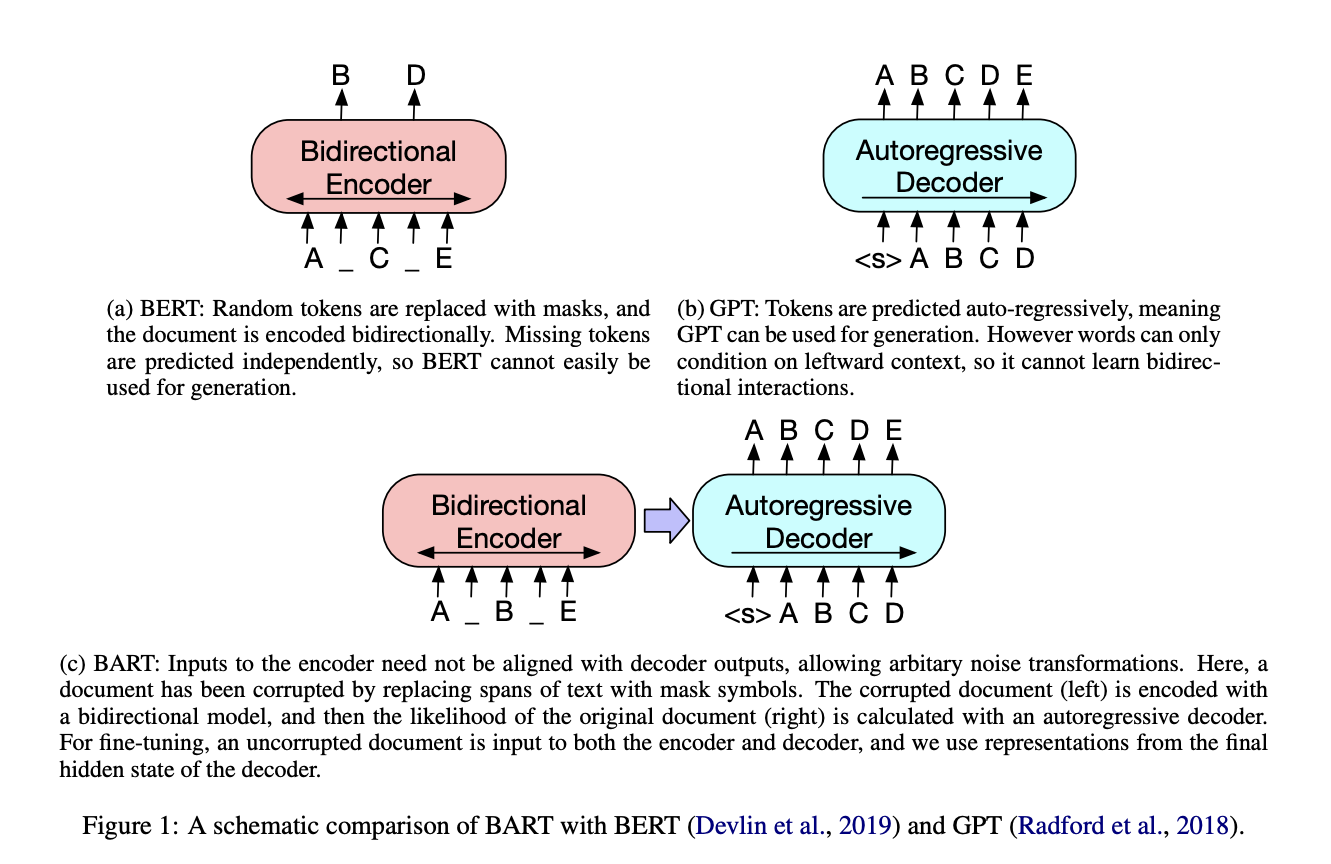

BART combines the strengths of autoencoder-based models and Transformer-based models, making it a powerful tool for NLP.

An autoencoder is a type of neural network architecture that consists of two parts: an encoder and a decoder. The encoder compresses the input into a lower-dimensional representation (latent representation) by transforming the input through a series of linear and non-linear transformations.

(The lower-dimensional representation is typically much smaller than the original input, so it can be thought of as a more compact representation of the data). This representation is then passed on to the decoder.

The decoder reconstructs the original input from the representation.(By transforming the lower-dimensional representation back into a higher-dimensional space that is similar to the original input. The decoder uses the same linear and non-linear transformations as the encoder, but in reverse order.) 

In the case of BART, the encoder and decoder both use Transformer-based architectures. *(The Transformer-based architecture allows the model to capture context-dependent relationships between tokens in the input sentence, resulting in a more accurate compression of the input into a lower-dimensional representation.)*



BART and GPT are both state-of-the-art language models developed for NLP tasks, and BERT is a bidirectional representation model that has been highly successful in a wide range of NLP tasks. While each of these models has its own strengths, BART offers some advantages over both BERT and GPT:

> Pretraining Objective: BART is pre-trained using a denoising autoencoder
objective, where the model is given a sentence with some tokens randomly replaced, deleted or added, and it is asked to reconstruct the original sentence. This objective helps BART handle noisy and corrupted input better compared to BERT and GPT, which are trained using masked language modeling and language modeling objectives, respectively. This is referred to as the "denoising" objective, as the model is expected to remove the "noise" (the replaced, deleted, or added tokens) and reconstruct the original sentence. By training on this objective, BART learns to handle noisy and corrupted input, making it well-suited for tasks such as text summarization and reconstruction.

> Model Architecture: BART uses an autoencoder-based architecture, which has an encoder that compresses the input sequence into a low-dimensional representation and a decoder that reconstructs the original sequence from the representation. This architecture helps BART better handle tasks that require reconstruction, such as text summarization and text-to-text generation.

> Pretraining Data: BART is trained on a diverse range of text, including news articles, web pages, and books, which makes it well-suited for a wide range of NLP tasks.

In terms of performance, BART has shown to outperform BERT and GPT on tasks such as text summarization and reconstruction, but it may not perform as well as BERT and GPT on other NLP tasks, such as question answering and text classification. 

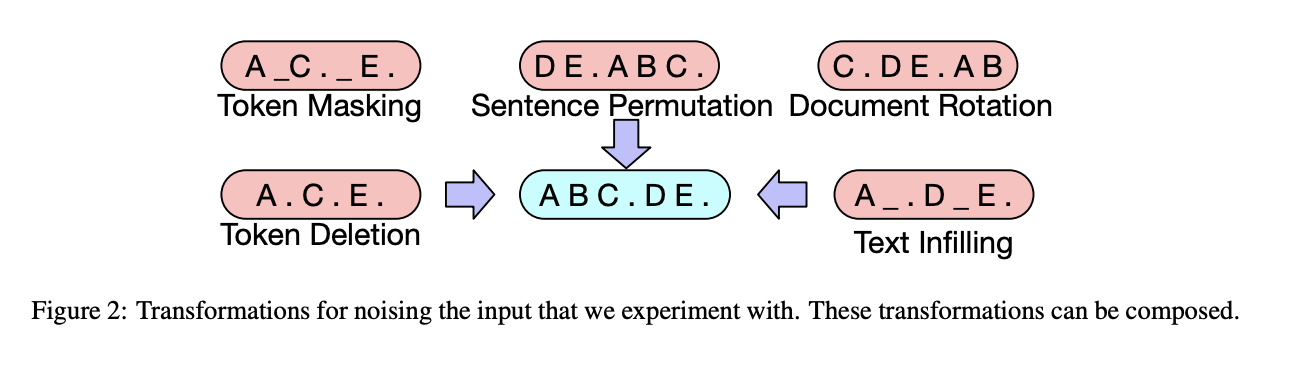

In [1]:
!pip install transformers



# The encoder in the BART model is responsible for encoding the input text into a dense and compact representation.
# The encoder takes the input text as input and processes it through a series of self-attention blocks and feedforward layers. 
# The self-attention blocks allow the model to capture relationships between words in the input text, 
# while the feedforward layers help to extract important features and produce a compact representation.
# The output of the encoder is then used as the input to the decoder, which generates the target text. 
# The encoder's representation of the input text provides important context and information to the decoder, allowing it to generate coherent and accurate target text.

In [2]:
import torch
try:
    import transformers
    from transformers import BartTokenizer, BartForConditionalGeneration
except ImportError:
    raise ImportError(INSTALL_MSG)
from IPython.display import display, Markdown

# If a GPU is available, the variable will be set to 'cuda',
# which indicates that PyTorch should use the GPU for computations. 
# If no GPU is available, the variable will be set to 'cpu', which indicates that PyTorch should use the CPU for computations.

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
LONG_SPACEX_ARTICLE = """
 WASHINGTON — NASA and SpaceX say they believe they have identified the Falcon 9 engine problem that aborted a GPS satellite launch in early October and delayed a commercial crew mission to the middle of November.

At an Oct. 28 briefing, Hans Koenigsmann, vice president of build and flight reliability at SpaceX, said the engine anomaly that aborted a Falcon 9 launch seconds before its scheduled liftoff Oct. 2 was caused by material that blocked a relief valve in the engine’s gas generator, which powers the engine’s turbopumps. The last-second abort prevented a hard start of the engine, he said, which could have damaged it.

He described the material found in the valve as a “masking lacquer,” a red substance similar to nail polish. The lacquer is used to protect surfaces when aluminum engine components are anodized for corrosion protection. That lacquer is then supposed to be removed with a cleaning fluid.

Koenigsmann said that anodizing work is done by a vendor, rather than in-house at SpaceX, and speculated that a change in processes there, such as using less cleaning fluid, could have caused the lacquer to remain. “We’ve talked to the people. We made them aware of that,” he said. “I’m pretty sure it will not happen any more.”

SpaceX examined the data from testing of other Merlin engines, and found two with similar engine startup signatures installed on the Falcon 9 booster that will be used for the Crew-1 commercial crew mission. SpaceX is replacing those two engines, as well as another Merlin engine installed on a Falcon 9 that will launch the Sentinel-6 Michael Freilich ocean science satellite Nov. 10.

NASA said Oct. 26 it has rescheduled the Crew-1 launch, previously planned for Oct. 31, to 7:49 p.m. Eastern Nov. 14. In that statement, NASA said the Crew-1 launch would take place “following a thorough review of launch vehicle performance” from the Sentinel-6 launch.

Agency officials at the briefing, though, offered mixed messages about the dependence of the Crew-1 launch on the Sentinel-6 launch. “Right now there is not a ‘hard bar’ between these missions,” said Kathy Lueders, NASA associate administrator for human exploration and operations, when asked if any delay in the Sentinel-6 launch would mean a delay for Crew-1. “We’re going to fly both missions when it’s the right time.”

Later in the call, Steve Stich, NASA commercial crew program manager, suggested the delayed GPS 3 mission would need to fly before Crew-1. “One of the engines that we are installing on the first stage has a slight change that we would like to see fly on the GPS 3 mission first,” he said. “We would like to see that one mission go fly before we fly crew.” SpaceX has yet to reschedule the GPS 3 launch.

NASA is continuing preparations for the Crew-1 mission based on a Nov. 14 launch. The four astronauts flying the mission entered what Stich called a “soft quarantine” at home with their families Oct. 25. They will go into a more stringent preflight quarantine Oct. 31 and travel to the Kennedy Space Center Nov. 6. A static-fire test of the Falcon 9’s first stage is scheduled for Nov. 9, followed by a final dress rehearsal for launch preparations Nov. 11.

A Nov. 14 launch would also enable a fast approach to the International Space Station, with docking about eight and a half hours after launch. Stich said that fast approach was enabled by the orbital alignment of the station for that particular launch opportunity, and is “about as short a time as we can accommodate” for the approach and docking of the spacecraft. If the launch slips a day to Nov. 15, the Crew Dragon would instead take 27.5 hours to dock with the station.

First, though, NASA and SpaceX must verify that the Falcon 9 is ready to launch that mission. “Over my life at SpaceX I’ve seen little things having big effects,” he said of the masking lacquer problem that aborted the GPS launch. “Rockets are humbling.”.
""".replace('\n','')

In [4]:
# Instance of BartTokenizer class, which is used to tokenize the input text
# from_pretrained method loads a pre-trained tokenizer that was trained on a large corpus of text.
# "facebook/bart-large-cnn" is a pre-trained transformer-based language model developed by Facebook AI Research and released through the Hugging Face model hub
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')# fine-tuned on CNN Daily Mail.
# instance of the BartForConditionalGeneration class, which represents the BART model
#  from_pretrained method to load a pre-trained model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
# tokenizer to encode the article text and convert it into a tensor suitable for use with the BART model.
# The batch_encode_plus method is used to tokenize the article text
# return_tensors argument is set to 'pt' to indicate that PyTorch tensors should be returned
#  max_length argument is set to 1024 to specify the maximum length of the input sequence
# he num_beams argument is set to 4, which specifies the number of beams to use in the beam search algorithm used by the model. 
#  n-grams of size 3 or greater should not be repeated in the generated text.
article_input_ids = tokenizer.batch_encode_plus([LONG_SPACEX_ARTICLE], return_tensors='pt')['input_ids'].to(torch_device)
summary_ids = model.generate(article_input_ids)
# generated summary from a sequence of token IDs back into text using the decode method of the tokenizer.
# squeeze method is used to remove extra dimensions from the tensor. 
summary_txt = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
display(Markdown('> **Summary: **'+summary_txt))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)